# Why Smooth N-Gram Models?

The purpose of this assignment is to demonstrate how, but mostly *why* we choose to smooth an n-gram language model. 

In practice, this is driven primarily by the fact that our training corpora are limited in size. The number of sentences that are grammatical (and thus probably deserving of some probability!) are provably infinite and the number of sequences seen by our model are finite, so even in theory it's impossible for our n-gram models not to assign 0 probability to perfectly reasonable sentences. **This is a problem!**

Our learning goals are to be able to:

1. Describe the limitations of MLE estimation of parameters from corpora.
2. Justify the idea of smoothing.
3. Be able to motivate the design of particular smoothing techniques by making reference to the properties of n-gram models and language data.

And additionally!

4. Practice inspecting computational models and language data to answer questions about the behavior and limitations of those models.

Let's get started!

In [5]:
with open("austen-emma.txt") as corpus_f:
    emma = corpus_f.read().split()

print("There are {} unique words in Emma. This is our vocab size!".format(
    len(list(set(emma)))
    ))

There are 7340 unique words in Emma. This is our vocab size!


In the following cell, copy over your code for counting the number of n-grams in a particular text from the prior activity. We're going to start looking at the number of *occurances* of particular ngrams in a text. In particular, get counts for **all of the unigrams, bigrams, and trigrams that appear in Emma**. Additionally, **compute the total number of unigrams/bigrams/trigrams observed in the data** (this should be fairly straightforward to compute, in code or by hand). 

In [10]:
from typing import Mapping

unigrams : Mapping[Sequence[str], int] = get_counts(emma, 1)
bigrams : Mapping[Sequence[str], int] = get_counts(emma, 2)
trigrams : Mapping[Sequence[str], int] = get_counts(emma, 3)

#TODO: Complete the above task using prior code!

Now let's take a glance at what our non-zero counts look like! First plotting a histogram of the counts that correspond to each trigram, sorted by most to least frequent. **Please play around with the code to try and better understand what's going on!**


**Note:** These plots will be very weird to read --- there are elements that are strange, and can be masked by the way we represent the data! That is intentional! Play with the code to get a feel for what the distribution looks like!

For example, the large number of counts for certain n-grams makes others hard to see. Try plotting the *log* of these the counts instead! Check out bigram and trigram counts!

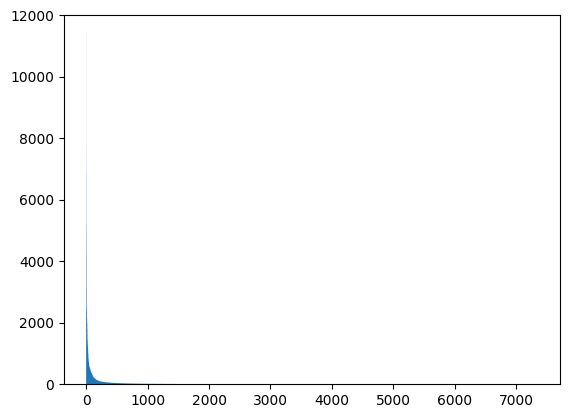

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def plot_counts(counts : Mapping[Sequence[str], int], cutoff = None):  
    values = sorted(list(counts.values()), key = lambda x: -x)[:cutoff]

    fig, ax = plt.subplots()
    ax.stairs(values, fill=True)
    plt.show()

plot_counts(unigrams)

Now lets look at how many n-grams have a *particular* count! 

I have commented out code that prints the counts in order from largest to smallest. This should answer a reasonable question about why the x-axis is so wide: There is, in fact, a single token with a very large count! **Play around and inspect the data more with your partner(s) to build an understanding of the distributional properties of the data!**

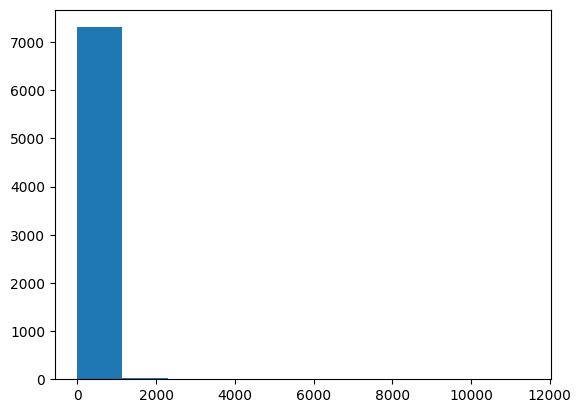

In [91]:
def plot_count_dist(counts : Mapping[Sequence[str], int]):  
    values = list(counts.values())
    #print(sorted(values, key = lambda x : -x))
    fig, ax = plt.subplots()
    ax.hist(values)
    plt.show()


plot_count_dist(unigrams)

Now, more of a combinatorics puzzle: **How many *possible* unigrams/bigrams/trigrams are there, given our vocabulary for Emma?**

**Bonus**: Write code to enumerate all of them and modify the plotting code above to incorporate 0 counts! I give you a generic function starter code below to do this for any $n$, but feel free to substitute an implementation that directly generates the lists for $n = 1,2,3$ (though writing this function may be a fun exercise for dealing with this kind of combinatoric search!).

Test on a smaller vocabulary than that of Emma, and ensure you get the right count!

In [88]:
from typing import Iterable, Sequence

def get_all_ngrams(vocab : Sequence[str], n : int) -> Iterable[Sequence[str]]:
    # TODO
    return []


One thing to consider is how *sparse* our data is with respect to the number of parameters we need to estimate. Our n-gram model is a conditional probability distribution that must assign a probability to any assignment of words from our vocab to any one of the $n$ random variables. As the combinatorics puzzle should indicate, that quickly becomes a *lot* of parameters and for a fixed dataset, the number of n-gram observations doesn't really change! That means that an n-gram with a very small, but non-zero probability has a chance of showing up 0 times! 

To see the scale of these probabilities, we can think about the (joint) probability we assign to an n-gram that appears a single time in our corpus. This is the smallest probability an MLE n-gram model can assign to a n-gram! Compute that for unigram/bigram/trigrams using the counts you got from Emma!

In [90]:
# TODO

Now let's consider a hypothetical model of language where every unigram/bigram/trigram was equally probable (i.e., *uniform*). This is obviously wrong (take a look at some of your possible bigrams/trigrams to convince yourself some should have 0 or near 0 probability!), but let's consider this just for the sake of building our intuitions. What probability should we assign to each unigram/bigram/trigram? 

In [89]:
# TODO

If your math is checking out, there should be orders of magnitude differences in these probabilities for larger n's! That means that even if a uniform distribution is silly, it's going to be hard to believe that our n-gram model has enough fidelity to represent the difference between an n-gram that should never exist (has probability 0) and one that is very unlikely (i.e., should have a small, but >0 probability). 

The exercises above are trying to convince you of a few things.

First, that models trained on finite data will underestimate the probability of rare n-grams that are not observed. This motivates smoothing in general!

Second, that part of this limitation comes from the fact that the smallest probability that we can assign in an MLE model is constrained. **How is it constrained?** 

This observation can be used to motivate (a) smoothing method(s) discussed in the reading (and in the homework!). **Which one(s)? How?**

Third, that there is a relationship between the hyperparameter $n$ for an n-gram model and the quality of the estimation of each parameter/probability we estimate for a given corpus. **What is that relationship?** 

This observation motivates (a) smoothing method(s) discussed in the reading and homework. **Which one(s)? What is the motivation?**
